In [1]:
import matplotlib.pyplot as plt
import numpy
from keras.layers import AveragePooling2D, Conv2D, Dense, Flatten
from keras.models import Sequential
from keras.optimizers.legacy import Adam
from keras.utils import image_dataset_from_directory

In [2]:
class_names = ["MildDemented", "ModerateDemented", "NonDemented", "VeryMildDemented"]

In [3]:
train_ds = image_dataset_from_directory(
    "../alzheimers_dataset/train/",
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="grayscale",
    batch_size=32,
    image_size=(208, 176),
    shuffle=True,
    seed=42,
)

Found 5121 files belonging to 4 classes.


2023-08-02 16:49:47.297561: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1
2023-08-02 16:49:47.297601: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2023-08-02 16:49:47.297616: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2023-08-02 16:49:47.297726: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-08-02 16:49:47.297806: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
test_ds = image_dataset_from_directory(
    "../alzheimers_dataset/test/",
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="grayscale",
    batch_size=32,
    image_size=(208, 176),
    shuffle=True,
    seed=42,
)

Found 1279 files belonging to 4 classes.


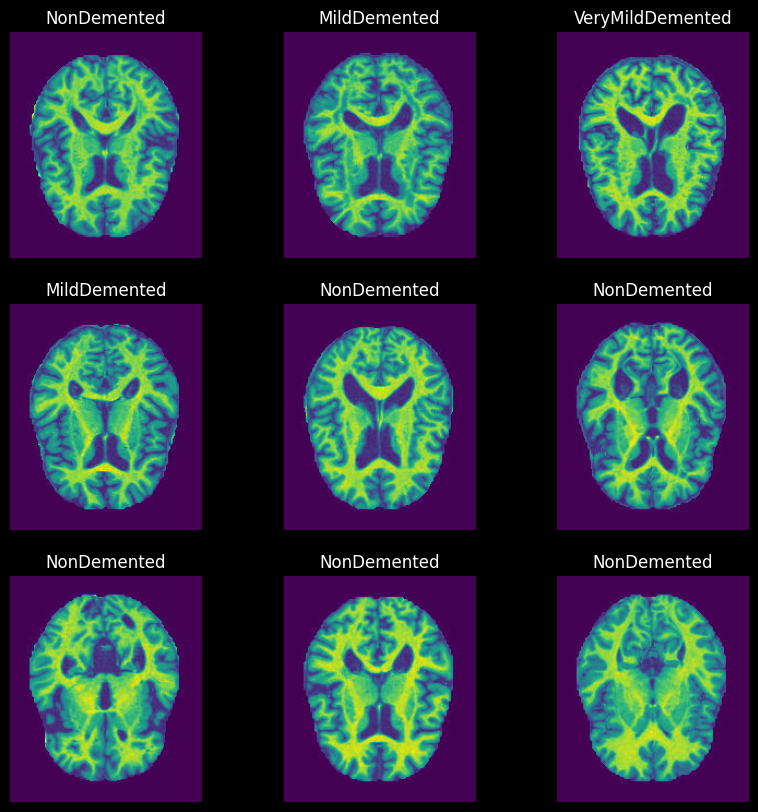

In [5]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[numpy.argmax(labels[i])])
        plt.axis("off")

In [6]:
input_shape = (208, 176, 1)
model = Sequential(
    layers=[
        Conv2D(
            filters=80,
            kernel_size=(2, 2),
            strides=1,
            activation="tanh",
            input_shape=input_shape,
        ),
        AveragePooling2D((2, 2)),
        Conv2D(filters=40, kernel_size=(2, 2), strides=1, activation="tanh"),
        AveragePooling2D((2, 2)),
        Conv2D(filters=20, kernel_size=(2, 2), strides=1, activation="tanh"),
        AveragePooling2D((2, 2)),
        Flatten(),
        Dense(40, activation="sigmoid"),
        Dense(20, activation="sigmoid"),
        Dense(4, activation="softmax"),
    ]
)
adam = Adam(learning_rate=0.1)
model.compile(loss="categorical_crossentropy", optimizer=adam, metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 207, 175, 80)      400       
                                                                 
 average_pooling2d (Average  (None, 103, 87, 80)       0         
 Pooling2D)                                                      
                                                                 
 conv2d_1 (Conv2D)           (None, 102, 86, 40)       12840     
                                                                 
 average_pooling2d_1 (Avera  (None, 51, 43, 40)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_2 (Conv2D)           (None, 50, 42, 20)        3220      
                                                                 
 average_pooling2d_2 (Avera  (None, 25, 21, 20)        0

In [7]:
epochs = 10
history = model.fit(train_ds, batch_size=32, epochs=epochs)

Epoch 1/10


2023-08-02 16:51:50.277882: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


161/161 [==============================] - 43s 252ms/step - loss: 1.0768 - accuracy: 0.4755
Epoch 2/10
161/161 [==============================] - 37s 229ms/step - loss: 1.0718 - accuracy: 0.4687
Epoch 3/10
161/161 [==============================] - 37s 230ms/step - loss: 1.0717 - accuracy: 0.4599
Epoch 4/10
161/161 [==============================] - 38s 236ms/step - loss: 1.0669 - accuracy: 0.4726
Epoch 5/10
161/161 [==============================] - 39s 241ms/step - loss: 1.0669 - accuracy: 0.4685
Epoch 6/10
161/161 [==============================] - 37s 229ms/step - loss: 1.0656 - accuracy: 0.4683
Epoch 7/10
161/161 [==============================] - 38s 239ms/step - loss: 1.0709 - accuracy: 0.4630
Epoch 8/10
161/161 [==============================] - 37s 233ms/step - loss: 1.0664 - accuracy: 0.4700
Epoch 9/10
161/161 [==============================] - 38s 235ms/step - loss: 1.0854 - accuracy: 0.4581
Epoch 10/10
161/161 [==============================] - 37s 231ms/step - loss: 1.0736

In [8]:
model.evaluate(test_ds)

 1/40 [..............................] - ETA: 11s - loss: 0.8777 - accuracy: 0.5000

2023-08-02 16:58:29.726742: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


40/40 [==============================] - 4s 103ms/step - loss: 1.0423 - accuracy: 0.5004


[1.0423142910003662, 0.5003909468650818]

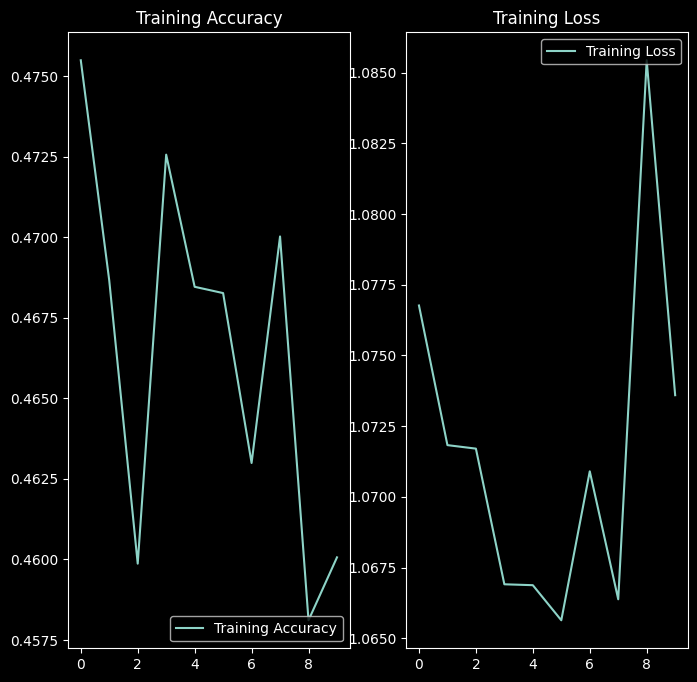

In [9]:
# Get the training and validation accuracy and losses from the history object
acc = history.history["accuracy"]
loss = history.history["loss"]

# Set the number of epochs
epochs_range = range(epochs)

# Plot the training and validation accuracy
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label="Training Accuracy")
plt.legend(loc="lower right")
plt.title("Training Accuracy")

# Plot the training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label="Training Loss")
plt.legend(loc="upper right")
plt.title("Training Loss")

# Show the plot
plt.show()